In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [40]:
c = np.array((2.8, -1.5, -0.9, 1.8, 2.4, 5.6))

a = 1
b = 1.44

eps = 0.0001

def P(x):
    res = 0
    for i in range(len(c)):
        res += c[i]*(x**i)
    return res

In [41]:
prob_x = np.arange(1, 1.44, 0.0001)

In [6]:
def trape(h, n):
    res_3 = (P(a) + P(b))/2
    for i in range(1, n):
        res_3 += P( a + i*h)
    return res_3*h

In [73]:
def sympson(h, n):
    res_4 = P(a) + P(b)
    for i in range(n):
        res_4 += 4*P((a + i*h + a + (i + 1)*h)/2)
    for i in range(1,n):
        res_4 += 2*P(a + i*h)
    return res_4*h/6

In [11]:
def dP2(x):
    return 112*x**3 + 28.8*x**2 + 10.8*x - 1.8
def dP4(x):
    return 336*x + 57.6

In [13]:
def M(k):
    if k == 2:
        return max(abs(dP2(prob_x)))
    elif k == 4:
        return max(abs(dP4(prob_x)))

In [39]:
func = lambda x : 2.8 - 1.5*x - 0.9*x**2 + 1.8*x**3 + 2.4*x**4 + 5.6*x**5
print(integrate.quad(func, 1, 1.44)) #1 элемент кортежа - оценочное значение интеграла, 2 - верхняя граница интеграла

(11.196316333124264, 1.2430408184021262e-13)


In [34]:
I = (P(b) - P(a))*((b - a)/2) #формула трапеции
print("Формула трапеции:", I)
print("Абсолютная погрешность:", abs(11.1963 - I))

Формула трапеции: 8.567199491276797
Абсолютная погрешность: 2.6291005087232033


In [37]:
I2 = (P(a) + 4*P((a+b)/2) + P(b))*(b - a)/6
print("Формула Симпсона:", I2)
print("Абсолютная погрешность:", abs(11.1963 - I2))

Формула Симпсона: 11.201340780748795
Абсолютная погрешность: 0.00504078074879466


In [64]:
prob_x = np.arange(1, 1.44, 0.0001)

In [65]:
def dP2(x):
    return 112*x**3 + 28.8*x**2 + 10.8*x - 1.8
def dP4(x):
    return 336*x + 57.6

In [66]:
def M(k):
    if k == 2:
        return max(abs(dP2(prob_x)))
    elif k == 4:
        return max(abs(dP4(prob_x)))

In [69]:
h2 = np.sqrt((12*eps)/ (M(2)*(b - a)))
n2 = int((b - a)/h2 + 1)
print("Шаги для формулы трапеции:", n2)
h2 = (b - a)/n2
print("шаг составной формулы трапеции", h2)
S = trape(h2, n2)
print("Результат:", S)
print("Погрешность:", abs(S - 11.1963))

Шаги для формулы трапеции: 171
шаг составной формулы трапеции 0.002573099415204678
Результат: 11.196380591537496
Погрешность: 8.05915374950672e-05


In [75]:
h4 = ((2880*eps)/(M(4)*(b - a)))**(1/4)
n4 = int((b - a)/h4 + 1)
print("Шаги для составной формулы Симпсона:", n4)
h4 = (b - a)/ n4
print("Шаг составной формулы Симпсона:", h4)
S = sympson(h4, n4)
print("Результат:", S)
print("Погрешность:", abs(S - 11.1963))

Шаги для составной формулы Симпсона: 3
Шаг составной формулы Симпсона: 0.14666666666666664
Результат: 11.196378363341845
Погрешность: 7.836334184396776e-05


In [18]:
a = -1.7
b = 0 

def f(x):
    return (np.cos(x) - x)*np.exp(x**2)
prob_x = np.arange(-1.7, 0, 0.01)

def M(k):
    return max(abs(d2f(prob_x)))
def d2f(x):
    return -(2*x**2 + np.sin(x) + 1 - 2*x*np.cos(x))*np.exp(x**2)

In [10]:
func = lambda x : (np.cos(x) - x)*np.exp(x**2)
print(integrate.quad(func, -1.7, 0)) #1 элемент кортежа - оценочное значение интеграла, 2 - верхняя граница интеграла

(10.24177624876237, 1.137065580443505e-13)


In [20]:
h = np.zeros(19)
res = np.zeros(19)
R = np.zeros(19)
R1 = np.zeros(19)

for i in range(2, 21):
    h[i-2] = (b - a)/i
    for j in range(i):
        res[i - 2] += h[i-2]*f((a + j*h[i-2] + a + (j+1)*h[i-2])/2)
    R[i-2] = abs(10.2417 - res[i-2])
    R1[i-2] = M(2)*(b-a)*h[i-2]/12

In [12]:
def df2(x): #производная
    return -(2*x**2 + np.sin(x) + 1 - 2*x*np.cos(x))*np.exp(x**2)

In [13]:
def M(k):
    return max(abs(d2f(prob_x)))

In [21]:
print("Шаги", h)

Шаги [0.85       0.56666667 0.425      0.34       0.28333333 0.24285714
 0.2125     0.18888889 0.17       0.15454545 0.14166667 0.13076923
 0.12142857 0.11333333 0.10625    0.1        0.09444444 0.08947368
 0.085     ]


In [22]:
print("Результат", res)

Результат [ 8.12672625  9.14621251  9.58600035  9.80896457  9.93596048 10.0146854
 10.06668525 10.10275931 10.12877818 10.1481464  10.16294495 10.17450232
 10.1836982  10.19113346 10.19722968 10.2022896  10.20653514 10.21013191
 10.2132055 ]


In [23]:
print("Абсолютная погрешность", R )

Абсолютная погрешность [2.11497375 1.09548749 0.65569965 0.43273543 0.30573952 0.2270146
 0.17501475 0.13894069 0.11292182 0.0935536  0.07875505 0.06719768
 0.0580018  0.05056654 0.04447032 0.0394104  0.03516486 0.03156809
 0.0284945 ]


In [24]:
print("Оценки теоретической погрешности", R1)

Оценки теоретической погрешности [11.59238666  7.72825777  5.79619333  4.63695466  3.86412889  3.31211047
  2.89809667  2.57608592  2.31847733  2.10770667  1.93206444  1.7834441
  1.65605524  1.54565155  1.44904833  1.3638102   1.28804296  1.22025123
  1.15923867]


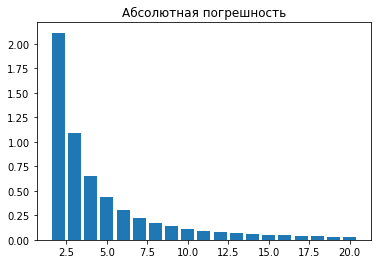

In [41]:
Y = np.arange(2, 21)
fig, ax = plt.subplots()
ax.bar(Y,R)
ax.set_title('Абсолютная погрешность')
plt.show()

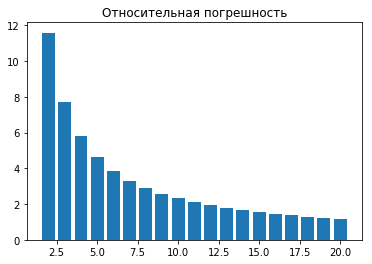

In [43]:
Y = np.arange(2, 21)
fig, ax = plt.subplots()
ax.bar(Y,R1)
ax.set_title('Относительная погрешность')
plt.show()